<a href="https://colab.research.google.com/github/irwenjust/VWD-exercise/blob/master/ML_speech_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning for Speech - **Homework 1**
**Instructors**: Trung Ngo Trong (trung@uef.fi) & Xuechen Liu (xuecliu@uef.fi)

**Deadline**: 2020.11.04, 9:50 AM (10 minutes before the session)

### Goals of this exercise
* Grab basics of Python and Google Colab
* Learn how to load waveform signal from files in multiple ways using python packages and perform basic analysis
* Have a glance on representitve signal processing steps
* Perform simple gender recognition based on F0

### Scoring (total: 10 points)
* **Prog Ex.1**: 2 points
* **Prog Ex.2**: 2 points
* **Prog Ex.3**: 6 points


## Introduction (and how to make submission)

### Programming
Throughout this course we use Python 3 as main programming language. A gentle introduction of Python 3 can be found at [this link](https://www.tutorialspoint.com/python3/index.htm). For this week's exercise (and probably later weeks'?) students are not required to use advanced methods so one can refresh/learn only basic parts. But of course if you have some programming experience, you will surely be comfortable on refreshing them all.

Apart from basic Python knowledge and more interesting packages and libraries which will be visited later, we generally heavily rely on:
* Numpy for numerical computation (and minor signal analysis). A comprehensive introduction can be found in [this Nature paper](https://www.nature.com/articles/s41586-020-2649-2);
* Matplotlib for visualization.
* Scikit-learn (sklearn) for basic machine learning related implementations.

In case students want to have a more compact tutorial:
* Trung's tutorial on those libraries are in [this link](https://colab.research.google.com/drive/1ISbtr5WV-77uR_ToZyF490SSSMVWQ_Mn?usp=sharing). 
* [Numpy tutorial from Stanford CS231n](https://colab.research.google.com/github/cs231n/cs231n.github.io/blob/master/python-colab.ipynb?fbclid=IwAR3kZTcxqJnSdB_BIrOH8A0Cv_cVHAOPEZ3MJbMP1EJlGiP4KWRt6TlR0xU)

### How to answer questions - **IMPORTANT**
To answer open-ended questions, there is no difference from answering them by pen and paper: you should simply create empty space under the question and provide your answers! Of course, if you want to do some typesetting, you may need some knowledge on [markdown](https://www.google.com/search?q=markdown+tutorial&oq=markdown+tutorial&aqs=chrome..69i57.2526j0j1&sourceid=chrome&ie=UTF-8) and [latex equations](https://www.overleaf.com/learn/latex/mathematical_expressions). For your reference, this note is written in Markdown.

### How to make submission - **IMPORTANT**
**File** $\to$ **Download .ipynb** $\to$ _Compress the .ipynb file to PDF and send the PDF to submit it to digicampus, or to instructors' email (as a back-up)_.

Note 1: Please re-name the PDF to your name and student number. Any modification/submission after the deadline will be disregarded.

Note 2: Please make sure your answers are included in generated PDF 😂

## Programming exercise 1: Basic I/O and visuals (2 points)
For this week you are asked to familiarize youself with some pythonic audio packages and perform some basic analysis on loaded waveform/signal.

So the very first task would be load waveform. Please run the code below to:
* Download the wav files to your local space
* Install packages we are going to use via a tool called [pip](https://pypi.org/project/pip/). People who use Python should be familiar with this guy (although there are some minor discussion on its potential problems compared with installing directly via source package). For people who does not familiar with Python, it will be very useful for this course to install packages under pythonic environments - this notebook, for example.

---




In [13]:
!wget -nc http://cs.uef.fi/~vvestman/sounds/Im_Superman.wav
!wget -nc http://cs.uef.fi/~vvestman/sounds/Count_Of_Three-8khz.wav
  
# Backup links:
#!wget -nc https://vvestman.github.io/summerschool19/sounds/Im_Superman.wav  
#!wget -nc https://vvestman.github.io/summerschool19/sounds/Count_Of_Three-8khz.wav
  
!pip install pysoundfile
!pip install numpy matplotlib 
!pip install librosa
!pip install python_speech_features

import numpy as np
import librosa
import python_speech_features
import soundfile
import matplotlib.pyplot as plt
import random

File ‘Im_Superman.wav’ already there; not retrieving.

File ‘Count_Of_Three-8khz.wav’ already there; not retrieving.



Next, we need to load the waveform and output the signal:

In [10]:
signal, _ = soundfile.read('Im_Superman.wav')

Hope you just ran the code above without errors. If there is any error, please track te error via colab utilities.

So the very first task is to plot the waveform via matplotlib. Specifically:
1. Plot the waveform loaded from `Im_Superman.wav` using utilities from matplotlib. Plot title is name of wav file.
2. Plot a random chunk of signal. Let's say length of chunk is 500. Plot title is $name_of_wav_file_500.
3. Repeat soundfile loading and tasks 1-2 for `Count_Of_Three-8khz.wav`. You can put all code in one block, as indicated below.

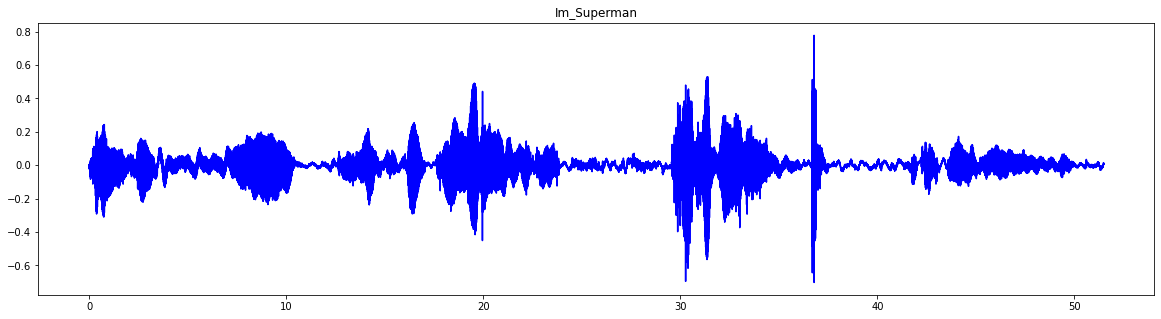

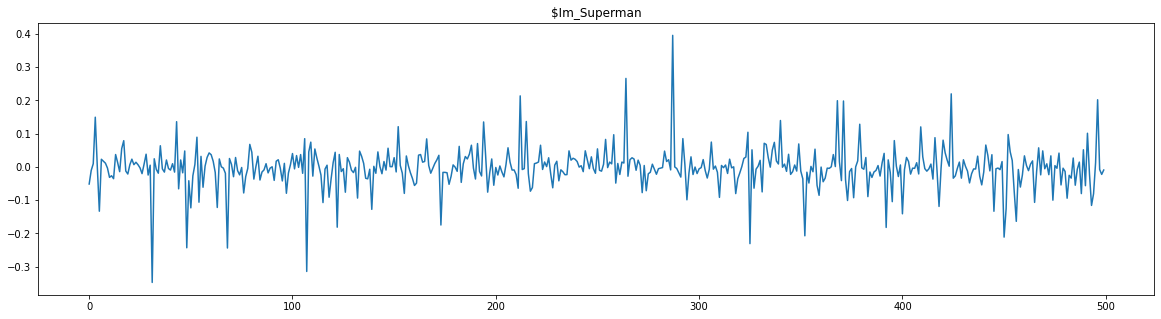

In [16]:
# TODO Code answers to tasks 1-2
musicFileName = 'Im_Superman.wav'
sig, sample_rate = soundfile.read(musicFileName)

serviceData = sig

plt.rcParams['figure.figsize'] = (20, 5) # Setting size of figure_size
plt.figure()
l=sig.shape[0]
x = [i/8000 for i in range(l)]
plt.plot(x, serviceData, c='b')
plt.title('Im_Superman')
plt.show()

random_chunk = random.sample(list(sig), 500)
plt.plot(random_chunk)
plt.title('$Im_Superman')
plt.show()


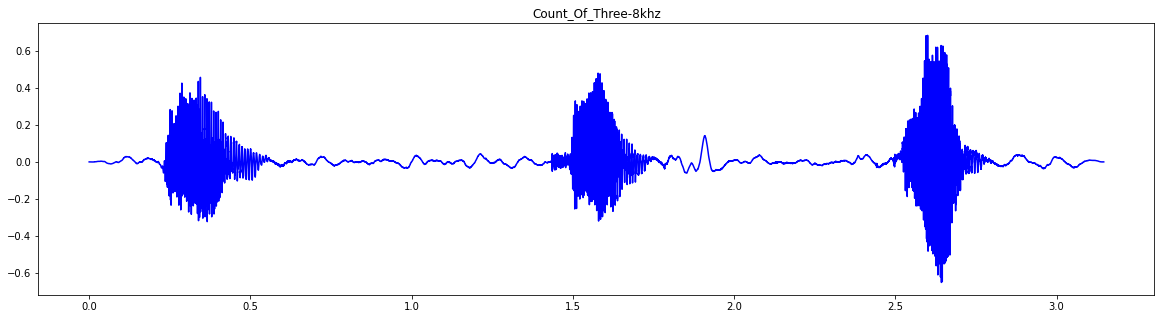

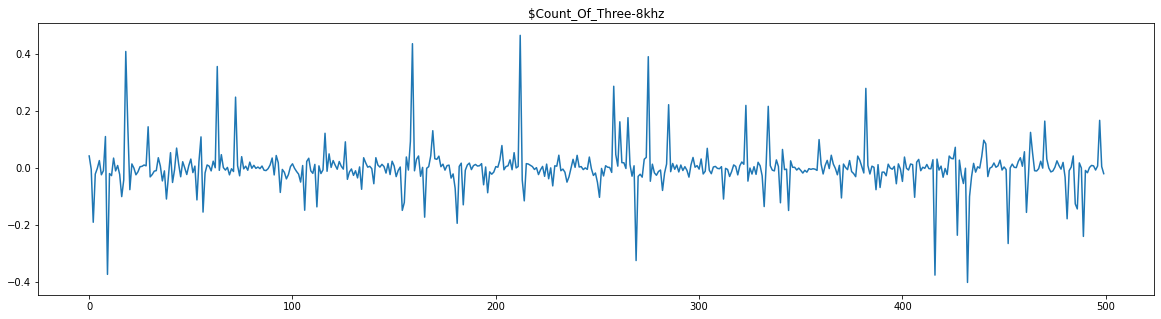

In [17]:
# TODO Code answers to task 3
musicFileName = 'Count_Of_Three-8khz.wav'
sig, sample_rate = soundfile.read(musicFileName)

serviceData = sig

plt.rcParams['figure.figsize'] = (20, 5) # Setting size of figure_size
plt.figure()
l=sig.shape[0]
x = [i/8000 for i in range(l)]
plt.plot(x, serviceData, c='b')
plt.title('Count_Of_Three-8khz')
plt.show()

random_chunk = random.sample(list(sig), 500)
plt.plot(random_chunk)
plt.title('$Count_Of_Three-8khz')
plt.show()




## Programming exercise 2: Pre-emphasis and voice activity detection (VAD) (2 points)
Often in speech processing tasks such as speech recognition and speaker verification, before doing any block-based steps, people conduct some pre-processing on signal itself. One can refer to [this article](http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/) as an example, where the steps for extracting an acoustic features called `Mel-freqneucy Cepstral Coefficients (MFCCs)` are described. While all of those steps such as window functions and Fourier transform will be covered later in the course, you are encouraged to have a quick look at them (and a bit of content in that page will be useful for the following exercise) ☺️. We won't cover them here but later explicitly.

The techniques we would like you to implement is not about MFCCs but some pre/post-processing steps. Namely:
1. Pre-emphasis. This should be applied on the signal itself and is nothing but a **linear filter**. Formally:
$y(n)=x(n)-a*x(n-1)$
, where $x(n)$ and $y(n)$ are input and output signal and $a$ is pre-emphasis coefficient.
2. Voice activity detection (VAD), where the input shall be **framed signal** or **acoustic feature matrix**, and we are supposed to filtered out **"unvoiced"** part of the frames/features based on some criteria. This is in general a very active research area, although we will only cover a simple-but-effective approach here.

In this exercise you are asked to implement such two functions in order to gain solid understanding of them. Specifically;
1. **Implement pre-emphasis function** `preemphasis`. You are encouraged to try various values of pre-emphasis coefficients to see the effect. What do you think is the most suitable value for $a$? Specific value or range of values are both OK.
2. **Implement a feature-level energy-based VAD detector** `compute_vad`. Output shall be features where frames that are voiced. A reference can be found at [here, in section 5](http://cs.joensuu.fi/pages/tkinnu/webpage/pdf/speaker_recognition_overview.pdf). You can see from the testing block that it is applied to MFCC features. How many frames are in the original signal and how many after? Hint: you can check number of frames from the feature matrix.
3. Apart from pre-emphasis and VAD, do you have any idea on what other pre/post-processing steps that common speech feature extractors have?

Note 1: using any build-in function from python audio libraries (e.g. `librosa.effects.preemphasis`) for implementation of those two methods is not allowed in your implementation. You are strongly encouraged to use only `numpy` (and optionally `scipy`).

Note 2: We use `python_speech_features` to produce framed signal in size of $num\_frames \times frame\_size$ and compute MFCCs. More about framing can be found in the article link above (step 1: Frame the signal into 20-40 ms frames. We set the frame size to be 25ms here).

In [66]:
# TODO Code answers to tasks 1-2
import numpy

def preemphasis(signal, coeff=0.95):
  '''Perform pre-emphasis
  @signal: input signal, in numpy array
  @coeff: pre-emphasis coefficient
  
  return: pre-emphasized signal, in numpy array
  '''
  return numpy.append(signal[0],signal[1:]-coeff*signal[:-1])

def compute_vad(frames):
  '''compute energy-based VAD indicator from framed signal
  @frames: framed signal, in size of [num_frames, frame_size]

  return: a vector indicator of voiced frames, in 1-D numpy array
          voiced frames are marked with 1, unvoiced as 0
          e.g. [ 0 0 1 .... 0 1 1 0 0 0 0 0]
  '''
  threshold = 0.001
  energy_list = []
  for frame in frames:
    frame = np.array(frame)
    energy = np.dot(frame, frame)/len(frame)
    if energy >= threshold:
      energy = 1
    else:
      energy = 0
    energy_list.append(energy)
  return np.array(energy_list)

Question in Task 2: How many frames are in the original signal and how many after?

Original: 2573 frames;
After: 186 frames.

In [67]:
# Testing to tasks 1-2
from python_speech_features import sigproc, mfcc
import numpy

def test_preemph_vad(signal, coeff=0.95, samp_rate=16000, n_mfccs=20):
  '''testing function for pre-emphasis and VAD
  @signal: input signal/waveform, in numpy array
  @coeff: pre-emphasis coefficient
  @samp_rate: sampling rate of signal, used in framing
  @n_mfccs: number of MFCC coefficients for each frame

  return: pre-emphasized signal, voiced frames filtered by VAD
  '''
  pre_emphed = preemphasis(signal, coeff)
  mfccs = mfcc(pre_emphed, samp_rate, n_mfccs)
  frames = sigproc.framesig(pre_emphed, 0.025*samp_rate, 0.01*samp_rate)
  indicators = compute_vad(frames)
  assert frames.shape[0] == indicators.shape[0]
  return pre_emphed, np.delete(mfccs, np.where(indicators==0)[0], axis=0), indicators

# you can print and plot those two to validate your answer then 
signal, _ = soundfile.read('Im_Superman.wav')
pre_emphed, voiced_mfccs, indicators = test_preemph_vad(signal)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


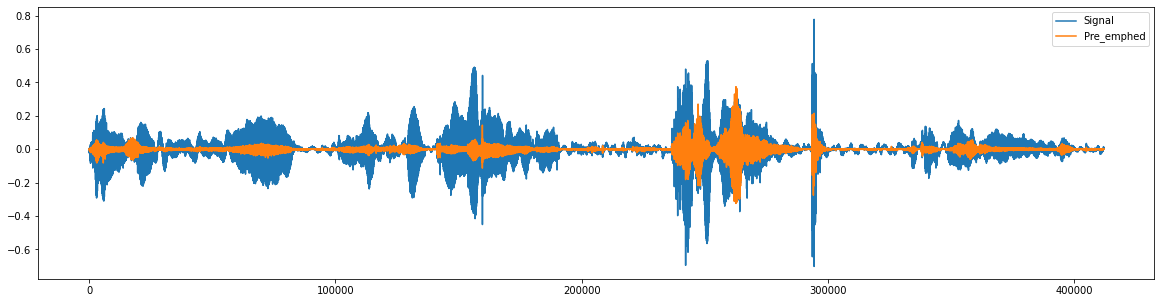

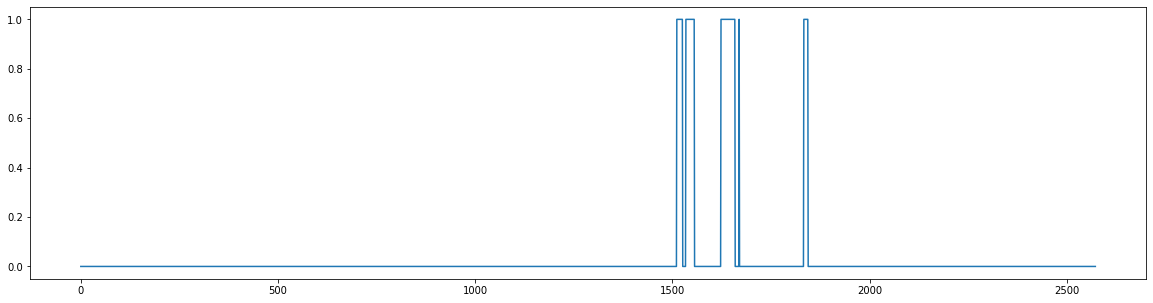

In [70]:
plt.plot(signal)
plt.plot(pre_emphed)
plt.legend(labels=['Signal','Pre_emphed'])
plt.show()
plt.plot(indicators)
plt.show()

Question 3: Apart from pre-emphasis and VAD, do you have any idea on what other pre/post-processing steps that common speech feature extractors have? (No need to list all of them, just one or two)

Such as channel conversion or windowing.

## Programming exercise 3: Simple gender recognition using F0 (6 points)
In the first lecture Tomi discussed a probabilistic classifier to predict a person's gender, based on the following assumptions:
1. Two *exhaustive and mutually exclusive* classes, female ($F$) and male ($M$). These are the possible values of our **class label** (denoted by $y$).
2. Flat/uninformative **prior** over the class variable: $P(M)=P(F)=\frac{1}{2}$. This distribution encodes our prior belief on the relative commonality of each of our two classes, before any measurement or speech recording takes place. The prior might present your subjective opinion, hunch, or perhaps an educated guess (e.g. based on prior statistics how often male/female users use a particular service on which you plan to mount the gender detector on). Besides flat prior you may wish to have different prior probabilities --- as long as they are positive and sum up to 1.
3. Our **observation** or **feature**, denoted by $x$, is the fundamental frequency (F0) in a given audio file (for instance, the **average** F0 value of all voiced speech frames). It is a non-negative real number. Here our measuring unit is Hertz (Hz).
4. Our **observation model** for these features $x$ was assumed to be Gaussian (normal distribution). More specifically, we assume that a randomly picked F0 value within a given gender follows a Gaussian distribution.
    
\begin{equation}
p(x|M) = \mathcal{N}(x|\mu_\text{M},\sigma_M^2)=\frac{1}{\sqrt{2\pi}\sigma_M}e^{-\frac{(x-\mu_M)^2}{2\sigma_M^2}}\nonumber
\end{equation}

\begin{equation}
p(x|F) = \mathcal{N}(x|\mu_\text{M},\sigma_F^2)=\frac{1}{\sqrt{2\pi}\sigma_F}e^{-\frac{(x-\mu_F)^2}{2\sigma_F^2}}\nonumber
\end{equation}

Your tasks are as follows.
1. **Parameter estimation based on training set.** In the lectures we used Wikipedia page for an *adhoc*, `pencil and paper' computation of the parameter values (means and variances for gender). Your task is to use **a labeled training dataset** --- pairs of F0 values and their gender labels $\{(x_i, y_i)\}_{i=1}^N$ --- to compute the parameters more objectively. More specifically, your task is to evaluate **sample mean** and **sample variance** for the parameters within each gender. Implement this parameter fitting process based on data provided by the instructors, and graph the resulting two probability density functions in the same figure (e.g. different colors for the genders).

> Question: What is the sample mean and variance for each gender from the training dataset?

2. **Evaluating the gender detector.** Additionally, your task is to **objectively evaluate** how accurate your gender recognizer is. Keep in mind all the time that in this course we are interested in methods that operate on **unseen data**. In this case it means that you should use <u>different speakers</u> to find the parameter values, and for the evaluation of your classifier. As for the evaluation (on new speakers/new data $x$), simply **predict** the class label using Bayes' rule --- i.e., choosing the `more probable' class: 

\begin{equation}
    \text{Gender}=
    \begin{cases}
      \text{male}, & \text{if}\ P(M|x) > P(F|x) \\
      \text{female}, & \text{if}\ P(M|x) \leq P(F|x)
    \end{cases}
\end{equation}

> This gives you a **prediction** of the gender based on data $x$. This prediction might be correct, or it might be wrong. Please report separately the number of errors in the two possible cases that we have:
* Your classifier says `male` but the actual gender is `female`;
* Your classifier says `female` but the actual gender is `male`.

> You can try with either wav files recorded by yourself or sample wav files from Lauri as presented in his lecture. We provided the downloading and un-reveling code below.

> Question: if you misclassified wav files, what do you think can be the reason?

3. **Working out Bayes threshold under a simplified model.** Consider a simpler model where the two genders differ in the means of their F0 distribution but have **shared variance**. That is, $p(x|M)=\mathcal{N}(x|\mu_M,\sigma^2)$ and $p(x|F)=\mathcal{N}(x|\mu_F,\sigma^2)$, where $\sigma^2$ is the common variance parameter. Suppose that we have again $P(M)=P(F)=\frac{1}{2}$ and assume additionally that $\mu_F > \mu_M$. Recall the above Bayes classifier in task 1. Show that under these modeling assumptions, the Bayes classifier is actually the same as our simple threshold-based classifier that we started with: 

\begin{equation}
    \text{Gender}=
    \begin{cases}
      \text{male}, & \text{if}\ x < t \\
      \text{female}, & \text{if}\ x \geq t \nonumber
    \end{cases}
\end{equation}

> In particular, find the closed-form expression of the threshold $t$ (in terms of our model parameters, $\mu_M$, $\mu_F$ and $\sigma^2$).



In [72]:
# Task 1: Download the dataset voxceleb_f0.txt
#
# attributes of the file: 
# [SPEAKER_ID GENDER F0_VALUE]
!wget -nc 'https://gist.githubusercontent.com/trungnt13/4a6a238995b42ba8b84fbab4b1d9fbe8/raw/ffd2958d57084d4220aee137068f31117f894b0e/voxceleb_f0.txt'

# You can uncomment code below to check if loading is successful
# with open('voxceleb_f0.txt', 'r') as v:
#   for line in v:
#     print(line)

File ‘voxceleb_f0.txt’ already there; not retrieving.



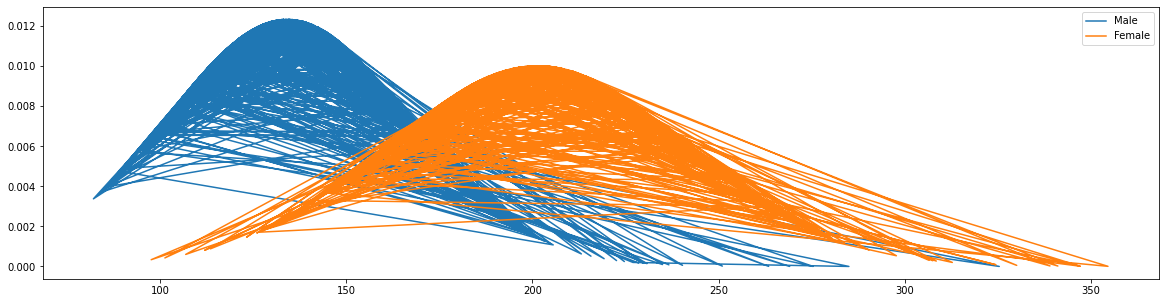

In [101]:
# TODO Code answer to Task 1 
# (please run the code block above first)

from scipy import stats

F = []
M = []
with open('voxceleb_f0.txt', 'r') as vox:
  for line in vox:
    id, gender, f0 = line.split(" ")
    if "f" in line:
      F.append(float(f0))
    else:
      M.append(float(f0))
M = np.array(M)
F = np.array(F)
m_m = np.mean(M)
m_v = np.var(M)
f_m = np.mean(F)
f_v = np.var(F)
plt.plot(M, stats.norm.pdf(M, np.mean(M), np.var(M)**0.5))
plt.plot(F, stats.norm.pdf(F, np.mean(F), np.var(F)**0.5))
plt.legend(labels=['Male','Female'])


Question in Task 1: What is the sample mean and variance for each gender from the training dataset?

Mean for male dataset: 134.19765729323308
Variance for male dataset: 1045.0539000477702
Mean for female dataset: 201.3626595238095
Variance for female dataset: 1583.940734100871


In [75]:
# Task 2: Download and unzip the sample wavs; install praat
#
!wget -nc https://gist.github.com/underdogliu/0f9535e668aa8e44a796297239bffb19/raw/877840f2a20293dc615614084a4e14d77f3fafbb/task2_eval_wavs.zip
!unzip task2_eval_wavs.zip
!pip install praat-parselmouth

# files are stored in folder 'sample_test_wavs/'.
# You can load files and check signal like below:
# import soundfile
# signal, _ = soundfile.read('sample_test_wavs/male1.wav')
# print(signal) 

--2020-11-04 02:58:31--  https://gist.github.com/underdogliu/0f9535e668aa8e44a796297239bffb19/raw/877840f2a20293dc615614084a4e14d77f3fafbb/task2_eval_wavs.zip
Resolving gist.github.com (gist.github.com)... 13.114.40.48
Connecting to gist.github.com (gist.github.com)|13.114.40.48|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/underdogliu/0f9535e668aa8e44a796297239bffb19/raw/877840f2a20293dc615614084a4e14d77f3fafbb/task2_eval_wavs.zip [following]
--2020-11-04 02:58:31--  https://gist.githubusercontent.com/underdogliu/0f9535e668aa8e44a796297239bffb19/raw/877840f2a20293dc615614084a4e14d77f3fafbb/task2_eval_wavs.zip
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1151798 (1.1M) [applica

In [82]:
import soundfile
import parselmouth

sigM1, _ = soundfile.read('sample_test_wavs/male1.wav')
sigM2, _ = soundfile.read('sample_test_wavs/male2.wav')
sigM3, _ = soundfile.read('sample_test_wavs/male3.wav')
sigF1, _ = soundfile.read('sample_test_wavs/female1.wav')
sigF2, _ = soundfile.read('sample_test_wavs/female2.wav')

def calc_f0(wav_file):
  '''helper function to calculate F0 value from a wav file,
    citing Lauri's sample code from lecture
  @wav_file: input path of wav file

  return: F0 value of the wav file, single value in Hertz
  '''
  sound = parselmouth.Sound(wav_file)
  pitch = sound.to_pitch()
  f0 = parselmouth.praat.call(pitch, "Get mean", 0.0, 0.0, "Hertz")
  return f0

# TODO Code answer to Task 2
def prediction(f0):
  calculated_pm = 2.71828**(-(f0-m_m)**2/(2*m_v)) / ((2*3.1415926*m_v)**0.5)
  calculated_pf = 2.71828**(-(f0-f_m)**2/(2*f_v)) / ((2*3.1415926*f_v)**0.5)

  if calculated_pf >= calculated_pm:
    return "Female"
  else:
    return "Male"
print(prediction(calc_f0(sigM1)))
print(prediction(calc_f0(sigM2)))
print(prediction(calc_f0(sigM3)))
print(prediction(calc_f0(sigF1)))
print(prediction(calc_f0(sigF2)))


Female
Female
Female
Female
Female


Question in Task 2: if you misclassified speaker's gender via F0, what do you think can be the reason?

Too difficult to ensure that the judgment is correct as the only reason that depends on gender is the variable f0. Single variable is too one-sided. 

In [ ]:
# TODO Code answer to Task 3
